<a href="https://colab.research.google.com/github/jeyson8/iml/blob/main/iml_at1_JeysonFerreiraAlves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
# Importando bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rcParams

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from pandas import Series, DataFrame

In [7]:
# Ler o arquivo database
database = pd.read_excel('/content/Database.xlsx')

In [8]:
# Visualizar dados da base
database.head()

,Branding,DPA 1,DPA 3,DRA 1,DRA 3,Display 1,Display 2,Rmkt 1,Rmkt 3,Rmkt 6,Rmkt 7,Search 1,Search 2,Search 3,Search 4,Search 5,Search 6,Shopping 1,Shopping 2,Shopping 3,Shopping 4,Shopping 5,Shopping 6,Shopping 7,Flag,leads
0,67.177647,0.000000,0.0,0.000000,0.00000,552.287329,0.000000,0.000000,0.0,20.519805,0.0,3353.594368,450.860760,75.718121,71.646370,0.0,965.950997,235.222462,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0,0
1,3420.885973,8786.139900,0.0,5737.041917,0.00000,2071.136177,1366.977361,35.350204,0.0,25.275315,0.0,7306.236564,422.858902,87.570070,344.762166,0.0,694.082774,2146.834248,531.891351,0.000000,0.000000,0.0,33.396586,0.0,0,0
2,4207.942789,6004.475770,0.0,12306.358005,0.00000,4229.737244,2713.175424,206.891574,0.0,38.460050,0.0,7889.436093,581.513248,102.705468,684.815084,0.0,2539.484046,2261.165457,2069.699426,282.404050,102.513534,0.0,380.934946,0.0,0,0
3,6328.724014,359.465712,0.0,0.000000,34.94577,4829.948289,1913.018103,88.015632,0.0,33.366603,0.0,2879.365595,1647.366100,109.320350,79.707614,0.0,559.289987,765.482371,2259.469113,197.917148,197.164612,0.0,66.560108,0.0,0,0
4,2165.951657,1637.755671,0.0,727.490691,0.00000,4956.284104,1766.960185,749.291333,0.0,34.499781,0.0,1246.079254,800.955961,13.565649,309.309140,0.0,421.522216,257.384030,3518.026591,272.718801,1033.278842,0.0,55.112592,0.0,1,0


In [57]:
# Selecionando 3 variáveis (Branding, Shopping 1 e leads)
database[['Branding','DPA 1','DPA 3','DRA 1','DRA 3','Display 1','Display 2','Rmkt 1','Rmkt 3','Rmkt 6','Rmkt 7','Search 1','Search 2','Search 3','Search 4','Search 5','Search 6','Shopping 1','Shopping 2','Shopping 3','Shopping 4','Shopping 5','Shopping 6','Shopping 7','leads']] [:10]

,Branding,DPA 1,DPA 3,DRA 1,DRA 3,Display 1,Display 2,Rmkt 1,Rmkt 3,Rmkt 6,Rmkt 7,Search 1,Search 2,Search 3,Search 4,Search 5,Search 6,Shopping 1,Shopping 2,Shopping 3,Shopping 4,Shopping 5,Shopping 6,Shopping 7,leads
0,67.177647,0.000000,0.0,0.000000,0.000000,552.287329,0.000000,0.000000,0.0,20.519805,0.0,3353.594368,450.860760,75.718121,71.646370,0.0,965.950997,235.222462,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0
1,3420.885973,8786.139900,0.0,5737.041917,0.000000,2071.136177,1366.977361,35.350204,0.0,25.275315,0.0,7306.236564,422.858902,87.570070,344.762166,0.0,694.082774,2146.834248,531.891351,0.000000,0.000000,0.0,33.396586,0.0,0
2,4207.942789,6004.475770,0.0,12306.358005,0.000000,4229.737244,2713.175424,206.891574,0.0,38.460050,0.0,7889.436093,581.513248,102.705468,684.815084,0.0,2539.484046,2261.165457,2069.699426,282.404050,102.513534,0.0,380.934946,0.0,0
3,6328.724014,359.465712,0.0,0.000000,34.945770,4829.948289,1913.018103,88.015632,0.0,33.366603,0.0,2879.365595,1647.366100,109.320350,79.707614,0.0,559.289987,765.482371,2259.469113,197.917148,197.164612,0.0,66.560108,0.0,0
4,2165.951657,1637.755671,0.0,727.490691,0.000000,4956.284104,1766.960185,749.291333,0.0,34.499781,0.0,1246.079254,800.955961,13.565649,309.309140,0.0,421.522216,257.384030,3518.026591,272.718801,1033.278842,0.0,55.112592,0.0,0
5,82.749432,0.000000,0.0,4.398999,0.000000,586.867944,0.000000,0.000000,0.0,15.000669,0.0,2209.137525,205.753677,121.384798,69.665332,0.0,322.929628,138.124220,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1
6,7179.241951,2392.709069,0.0,1746.316852,34.143759,1350.540236,2764.157177,1491.001258,0.0,35.922187,0.0,4999.870556,704.248442,59.828694,2802.413610,0.0,925.583080,755.508637,2204.537485,0.000000,393.712293,0.0,289.286270,0.0,1
7,3169.370556,1433.324970,0.0,1752.728695,33.849002,4841.719832,2658.276202,1386.355881,0.0,34.145305,0.0,12244.770369,703.665784,180.322369,1018.294250,0.0,681.716715,671.948625,2462.005119,492.177789,552.654540,0.0,284.851214,0.0,1
8,5866.153168,4580.870906,0.0,911.237313,0.000000,2765.013890,3381.453667,1436.320518,0.0,32.808800,0.0,1256.224358,1600.246205,105.029246,680.565108,0.0,459.854258,250.549795,2908.959000,391.733947,1534.707462,0.0,428.589515,0.0,1
9,2783.941751,2081.076151,0.0,67.220609,0.000000,1561.190571,1670.957141,445.287808,0.0,34.521205,0.0,1322.393742,870.758389,7.245524,776.100456,0.0,430.899583,313.038152,4349.232829,496.382669,1019.898273,0.0,54.331145,0.0,1


In [58]:
#As variáveis de entrada serão Branding e Shopping 1
X = database[['Branding','DPA 1','DPA 3','DRA 1','DRA 3','Display 1','Display 2','Rmkt 1','Rmkt 3','Rmkt 6','Rmkt 7','Search 1','Search 2','Search 3','Search 4','Search 5','Search 6','Shopping 1','Shopping 2','Shopping 3','Shopping 4','Shopping 5','Shopping 6','Shopping 7',]]

In [59]:
# A variável de saída será leads
y = database[['leads']]

In [60]:
#SEPARANDO OS CONJUNTOS DE TREINO E TESTE

# 70% dos dados para treino e 30% para teste
x_train, x_test, y_train, y_test = train_test_split( X, database.leads, test_size=0.3)

In [61]:
# Tamanho dos dados de treino
x_train.shape, y_train.shape

((392, 24), (392,))

In [62]:
# Tamanho dos dados de teste
x_test.shape, y_test.shape

((168, 24), (168,))

In [63]:
# Instanciando a Regressão Linear
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

In [64]:
# Treinando o modelo
lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
# Predizendo os valores para o conjunto de teste
pred = lreg.predict(x_test)

In [66]:
# Calculando o Mean Square Error
mse = np.mean((pred - y_test)**2)
mse

50534.49374212798

In [67]:
# Calculando os coeficientes
coeff = DataFrame(x_train.columns)
coeff['Coeficientes'] = Series(lreg.coef_)
coeff

,0,Coeficientes
0,Branding,0.002197
1,DPA 1,0.004748
2,DPA 3,0.279555
3,DRA 1,-0.012634
4,DRA 3,0.188453
5,Display 1,-0.000020
6,Display 2,-0.000727
7,Rmkt 1,0.012271
8,Rmkt 3,0.335398
9,Rmkt 6,-2.295026


In [69]:
# Calculando o r-squared
lreg.score(x_test, y_test)

0.52958919297448

In [70]:
# Ridge Regression
# Importando e instanciando a classe Ridge
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.05, normalize=True)

In [71]:
ridgeReg.fit(x_train,y_train)

Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [72]:
# Treinando o modelo
pred = ridgeReg.predict(x_test)
mse = np.mean((pred - y_test)**2)
mse

48783.27049146082

In [73]:
ridgeReg.score(x_test,y_test)

0.5458908175011237

In [74]:
# Verificação do impacto nos coeficientes de forma gráfica
def plot_coeficientes_ridge(alpha):
  ridgeReg = Ridge(alpha=alpha, normalize=True)
  ridgeReg.fit(x_train,y_train)
  predictors = x_train.columns
  coef = Series(ridgeReg.coef_,predictors).sort_values()
  print(coef)
  coef.plot(kind='bar', title='Ridge Coefficients')

Rmkt 6       -2.119510
Shopping 7   -0.103467
Shopping 4   -0.090020
Shopping 6   -0.087468
Rmkt 7       -0.023977
Search 6     -0.013441
DRA 1        -0.012129
Search 5     -0.006479
Shopping 3   -0.002149
Display 2    -0.000409
Display 1    -0.000010
Search 1      0.000300
Branding      0.002240
Shopping 1    0.002295
Shopping 2    0.003440
DPA 1         0.004410
Search 2      0.007215
Search 4      0.007961
Rmkt 1        0.012217
Shopping 5    0.047432
Search 3      0.130127
DRA 3         0.158833
DPA 3         0.274824
Rmkt 3        0.314257
dtype: float64


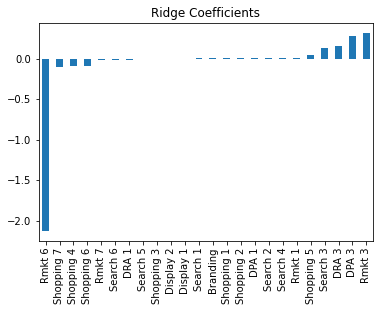

In [75]:
# Magnitude com alpha = 0.01
plot_coeficientes_ridge(0.01)

Rmkt 6       -0.615381
DRA 3        -0.207840
Rmkt 3       -0.147127
Shopping 6   -0.046030
Shopping 3   -0.040394
Shopping 7   -0.031697
Search 3     -0.027976
Shopping 4   -0.021400
Search 4     -0.013397
DPA 3        -0.006026
DRA 1        -0.002052
Display 1     0.000247
DPA 1         0.000535
Display 2     0.000797
Search 1      0.000947
Shopping 2    0.000973
Shopping 1    0.001126
Search 5      0.001306
Branding      0.001367
Rmkt 7        0.002060
Search 2      0.002595
Rmkt 1        0.003039
Search 6      0.007161
Shopping 5    0.008082
dtype: float64


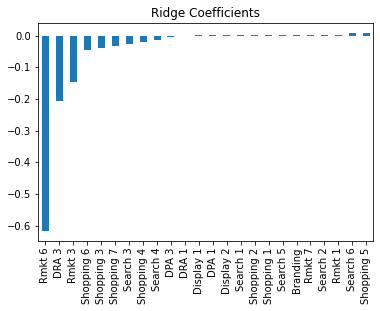

In [77]:
# Magnitude com alpha= 10
plot_coeficientes_ridge(10)

In [79]:
# Lasso Regression
from sklearn.linear_model import Lasso
lassoReg = Lasso(alpha=0.05, normalize=True)

In [80]:
# Treinando o modelo
lassoReg.fit(x_train,y_train)

Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [81]:
# Realizando a predição e calculando as métricas
pred = lassoReg.predict(x_test)
mse = np.mean((pred - y_test)**2)
mse

49524.14452040921

In [82]:
lassoReg.score(x_test,y_test)

0.5389942380747956

In [83]:
# Verificar o impacto nos coeficientes de forma gráfica
def plot_coeficientes_lasso(alpha):
  lassoReg = Lasso(alpha=alpha, normalize=True)
  lassoReg.fit(x_train,y_train)
  predictors = x_train.columns
  coef = Series(lassoReg.coef_,predictors).sort_values()
  print(coef)
  coef.plot(kind='bar', title='Lasso Coefficients')

Rmkt 6       -2.189743
Shopping 7   -0.101636
Shopping 4   -0.091647
Shopping 6   -0.082423
Rmkt 7       -0.024986
Search 6     -0.012630
DRA 1        -0.012419
Search 5     -0.007246
Display 2    -0.000405
Shopping 3   -0.000000
Display 1    -0.000000
Search 1      0.000097
Branding      0.002047
Shopping 1    0.002080
Shopping 2    0.003360
DPA 1         0.004711
Search 2      0.007397
Search 4      0.008733
Rmkt 1        0.012214
Shopping 5    0.049447
Search 3      0.130593
DRA 3         0.138475
DPA 3         0.274389
Rmkt 3        0.295371
dtype: float64


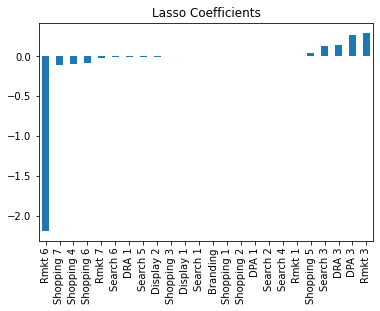

In [84]:
# Magnitude com alpha= 0.01
plot_coeficientes_lasso(0.01)

Rmkt 6       -1.326712
Shopping 4   -0.058325
DRA 1        -0.007230
Search 4     -0.001853
Shopping 7   -0.000000
Shopping 3   -0.000000
DRA 3        -0.000000
Display 1     0.000000
Display 2     0.000000
Search 6      0.000000
Rmkt 3        0.000000
Rmkt 7        0.000000
Shopping 6   -0.000000
Search 5      0.000000
Search 3      0.000000
Branding      0.000542
Rmkt 1        0.000654
Search 1      0.000911
Shopping 1    0.001468
Shopping 2    0.003993
DPA 1         0.004201
Search 2      0.005720
Shopping 5    0.020407
DPA 3         0.071463
dtype: float64


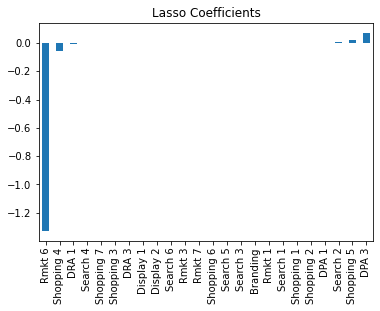

In [85]:
# Magnitude com alpha= 0.5
plot_coeficientes_lasso(0.5)

In [86]:
# ElasticNet
from sklearn.linear_model import ElasticNet

In [87]:
# Instanciando a classe e treinando o modelo
ENreg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)
ENreg.fit(x_train,y_train)

ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [88]:
# Realizando as predições e calculando as métricas
pred = ENreg.predict(x_test)
mse = np.mean((pred - y_test)**2)
mse

50529.56172470786

In [89]:
ENreg.score(x_test,y_test)

0.5296351036806739

In [90]:
# Impacto coeficientes forma gráfica
def plot_coeficientes_elastic(alpha,l1):
  ENreg = ElasticNet(alpha=alpha, l1_ratio=l1, normalize=False)
  ENreg.fit(x_train,y_train)
  predictors = x_train.columns
  coef = Series(ENreg.coef_,predictors).sort_values()
  print(coef)
  coef.plot(kind='bar', title='Elastic Coefficients')

Rmkt 6       -2.262414
Shopping 7   -0.112443
Shopping 4   -0.094570
Shopping 6   -0.087635
Rmkt 7       -0.025568
Search 6     -0.014384
DRA 1        -0.012638
Search 5     -0.007517
Display 2    -0.000716
Display 1    -0.000022
Search 1      0.000060
Shopping 3    0.000457
Shopping 1    0.002207
Branding      0.002212
Shopping 2    0.003468
DPA 1         0.004747
Search 2      0.007787
Search 4      0.010647
Rmkt 1        0.012287
Shopping 5    0.050798
Search 3      0.137497
DRA 3         0.183213
DPA 3         0.278337
Rmkt 3        0.322464
dtype: float64


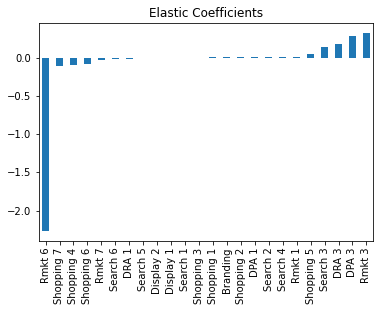

In [91]:
plot_coeficientes_elastic(1,0.5)

Rmkt 6       -2.274509
Shopping 7   -0.111657
Shopping 4   -0.094453
Shopping 6   -0.087219
Rmkt 7       -0.025553
Search 6     -0.014366
DRA 1        -0.012625
Search 5     -0.007526
Display 2    -0.000722
Display 1    -0.000022
Search 1      0.000066
Shopping 3    0.000321
Branding      0.002204
Shopping 1    0.002206
Shopping 2    0.003472
DPA 1         0.004747
Search 2      0.007773
Search 4      0.010664
Rmkt 1        0.012278
Shopping 5    0.050807
Search 3      0.137568
DRA 3         0.180403
DPA 3         0.278686
Rmkt 3        0.316880
dtype: float64


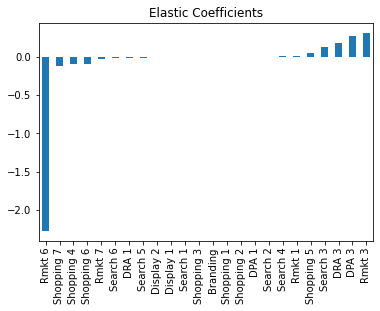

In [92]:
plot_coeficientes_elastic(1,1)